In [1]:
from utils import create_text_embeddings, display_random_item, calc_ann_metric
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import torch
from annoy import AnnoyIndex
from tqdm.notebook import tqdm

In [2]:
company_data = pd.read_csv("company_data.csv")
comparable_data = pd.read_csv("comparable_data.csv")

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model_name = "cointegrated/rubert-tiny2"

In [5]:
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model.to(device)

c:\Users\Kate\Desktop\cv_project\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(83828, 312, padding_idx=0)
    (position_embeddings): Embedding(2048, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)

In [6]:
company_text_embeddings = create_text_embeddings("company_data.csv", model, tokenizer)

  0%|          | 0/984 [00:00<?, ?it/s]

c:\Users\Kate\Desktop\cv_project\.venv\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [7]:
databse_text_embeddings = create_text_embeddings(
    "comparable_data.csv", model, tokenizer
)

  0%|          | 0/13718 [00:00<?, ?it/s]

In [8]:
forest = AnnoyIndex(len(databse_text_embeddings[0]), metric="angular")
for i, item in tqdm(enumerate(databse_text_embeddings)):
    forest.add_item(i, item.cpu().detach().tolist())
forest_labels = comparable_data["target"].tolist()
forest.build(50)
forest.save("forest_berttiny_not_trainedv1.ann")

0it [00:00, ?it/s]

True

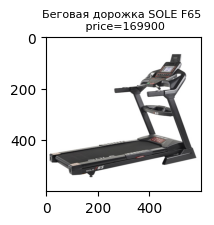

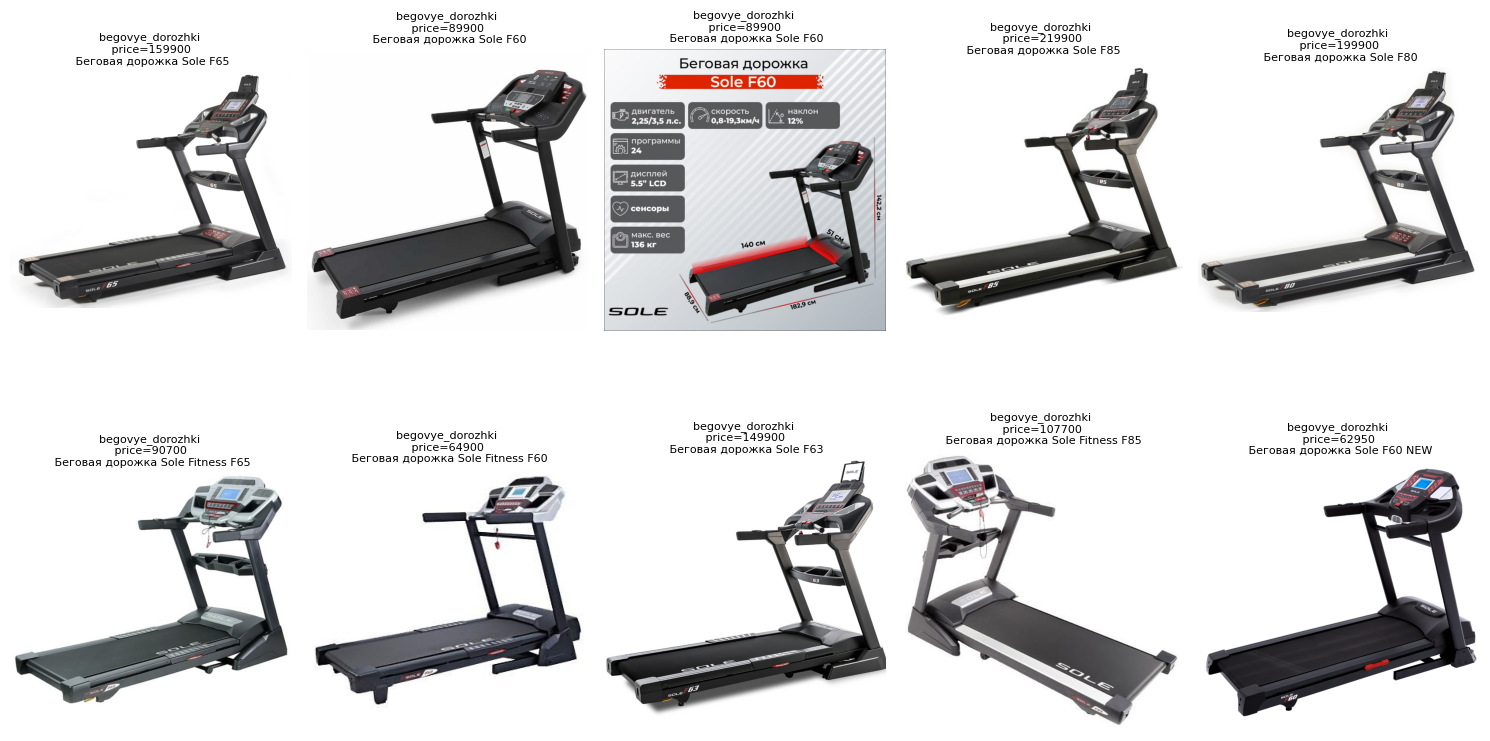

In [9]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=0,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings,
    database_emb=databse_text_embeddings,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer
)

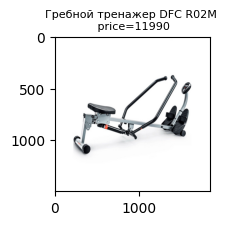

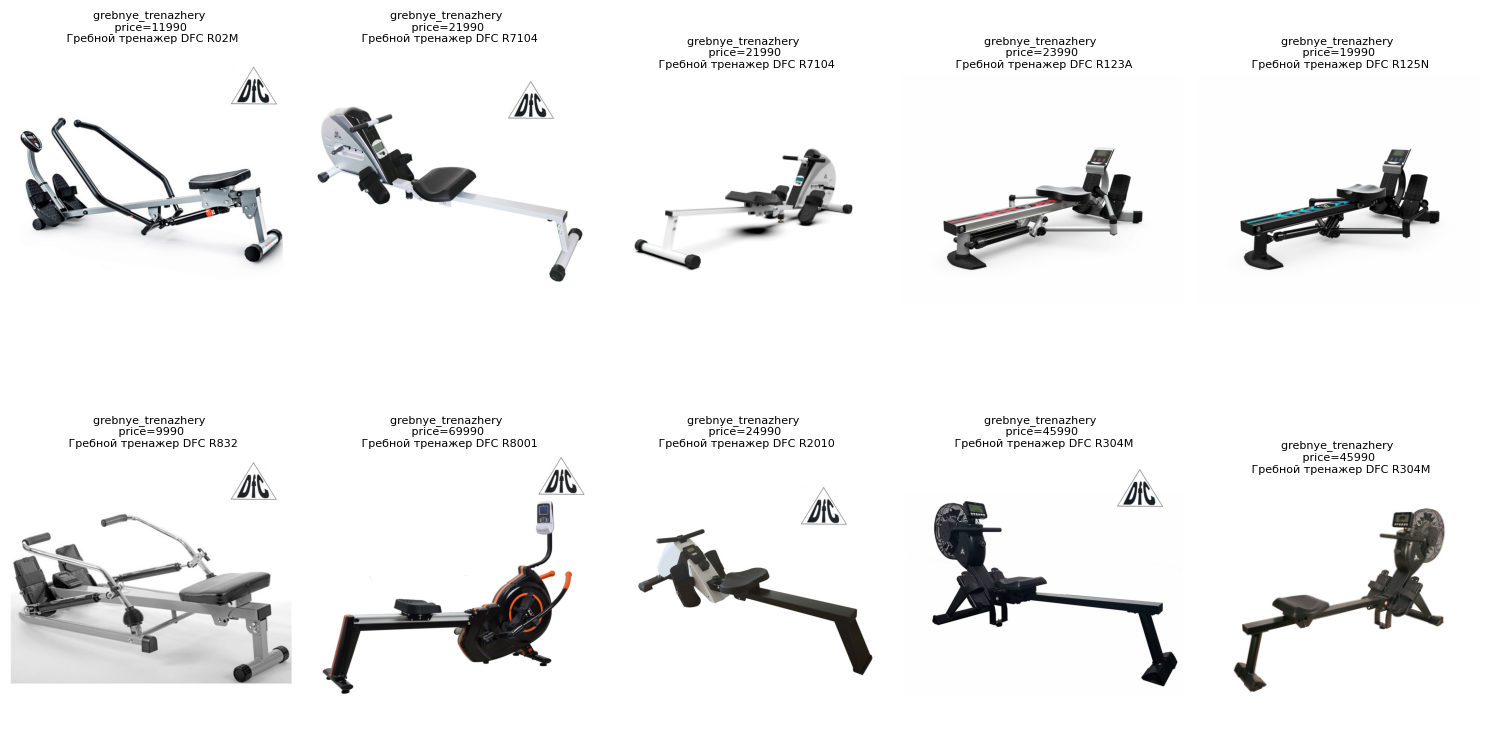

In [10]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=500,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings,
    database_emb=databse_text_embeddings,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

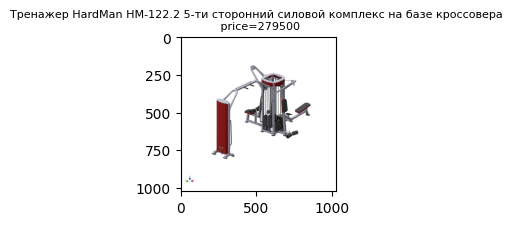

In [11]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=621,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings,
    database_emb=databse_text_embeddings,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

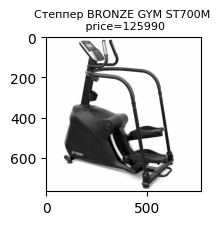

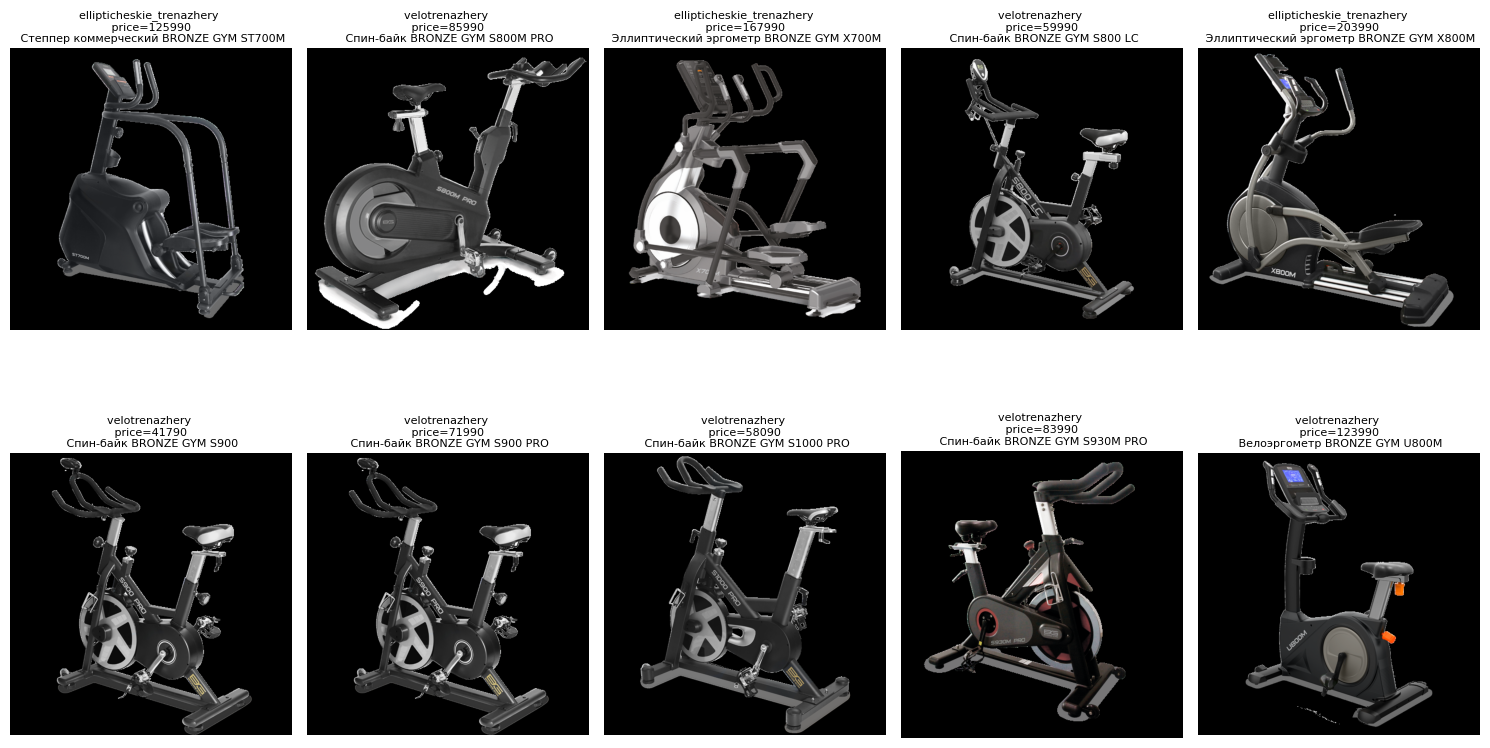

In [12]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=626,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings,
    database_emb=databse_text_embeddings,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

In [13]:
calc_ann_metric(10, forest, company_text_embeddings, company_data, comparable_data)
calc_ann_metric(5, forest, company_text_embeddings, company_data, comparable_data)

  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 10: 0.3683
trenazhery_na_svobodnykh_vesakh acc at 10: 0.3429
steppery acc at 10: 0.1545
ellipticheskie_trenazhery acc at 10: 0.9824
grebnye_trenazhery acc at 10: 0.661
velotrenazhery acc at 10: 0.9528
begovye_dorozhki acc at 10: 1.0
Total acc at 10: 0.7321


  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 5: 0.4267
trenazhery_na_svobodnykh_vesakh acc at 5: 0.3714
steppery acc at 5: 0.2036
ellipticheskie_trenazhery acc at 5: 0.984
grebnye_trenazhery acc at 5: 0.734
velotrenazhery acc at 5: 0.9597
begovye_dorozhki acc at 5: 0.9981
Total acc at 5: 0.7547


In [14]:
company_text_embeddings_v2 = create_text_embeddings(
    "company_data.csv", model, tokenizer, info_used="title_cat"
)

  0%|          | 0/984 [00:00<?, ?it/s]

In [15]:
databse_text_embeddings_v2 = create_text_embeddings(
    "comparable_data.csv", model, tokenizer, info_used="title_cat"
)

  0%|          | 0/13718 [00:00<?, ?it/s]

In [16]:
forest = AnnoyIndex(len(databse_text_embeddings_v2[0]), metric="angular")
for i, item in tqdm(enumerate(databse_text_embeddings_v2)):
    forest.add_item(i, item.cpu().detach().tolist())
forest_labels = comparable_data["target"].tolist()
forest.build(50)
forest.save("forest_berttiny_not_trainedv2.ann")

0it [00:00, ?it/s]

True

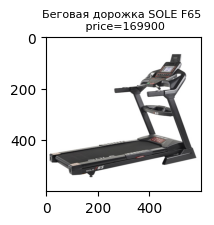

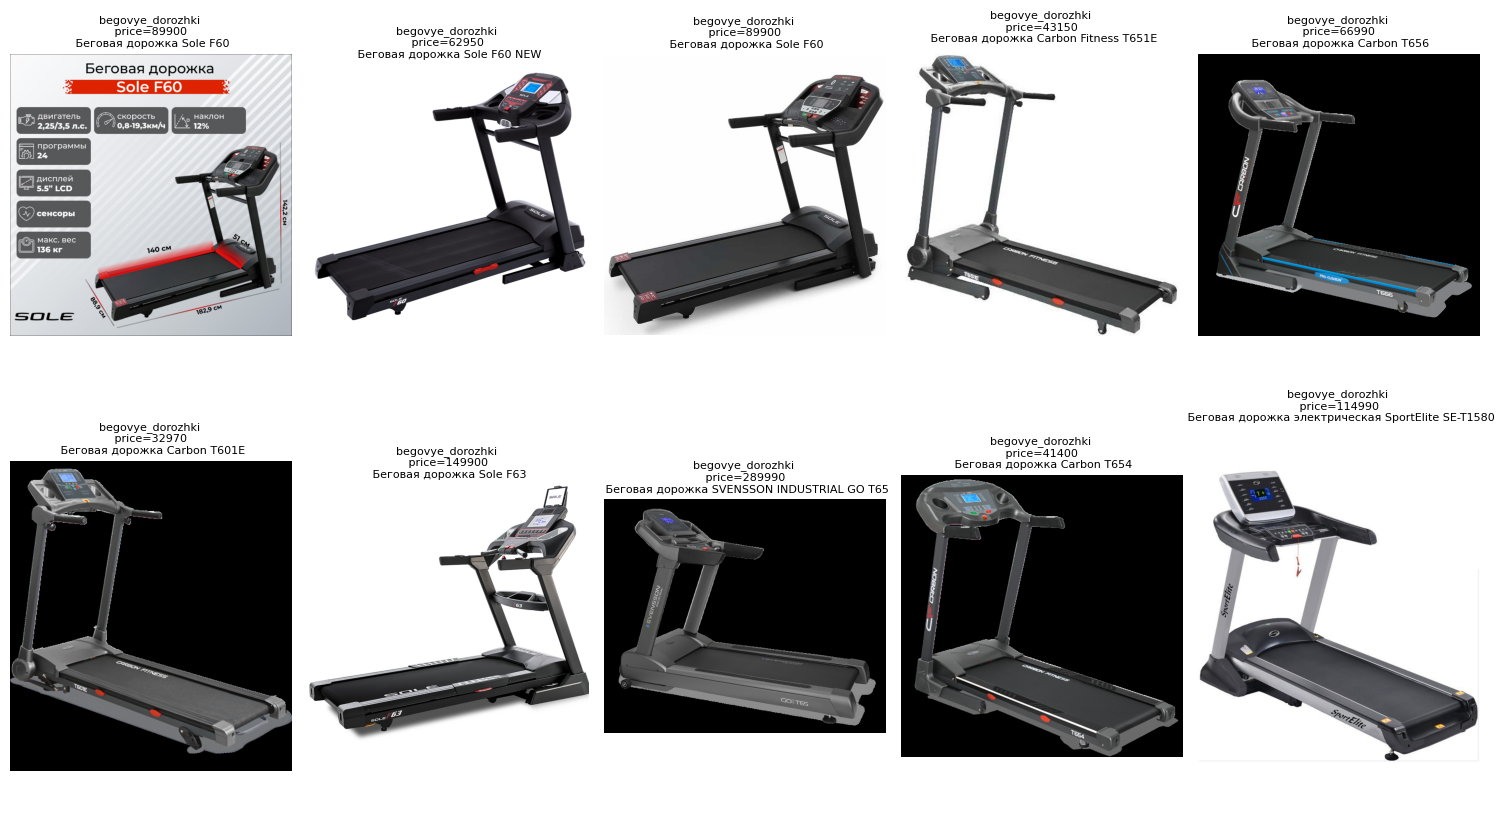

In [17]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=0,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v2,
    database_emb=databse_text_embeddings_v2,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

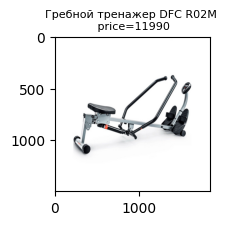

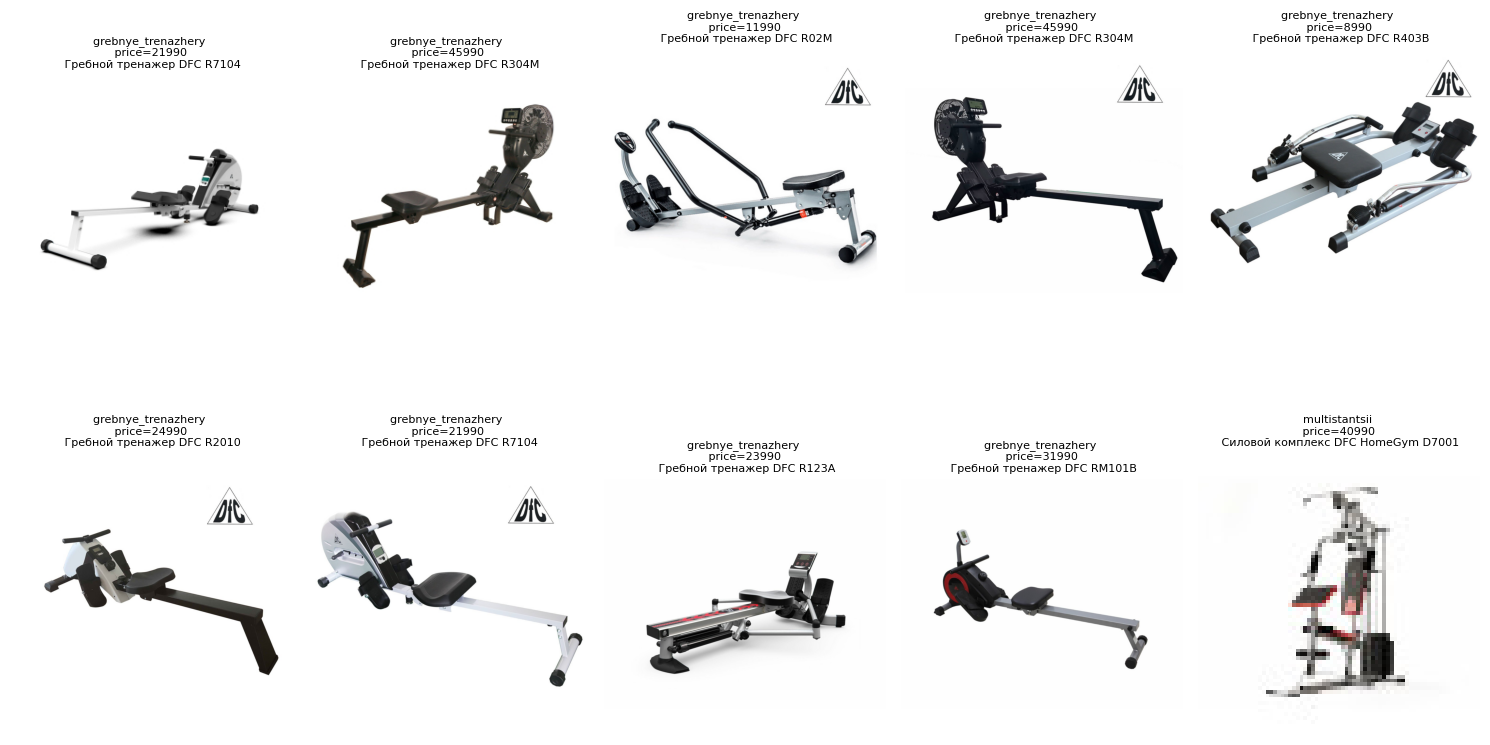

In [18]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=500,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings,
    database_emb=databse_text_embeddings,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

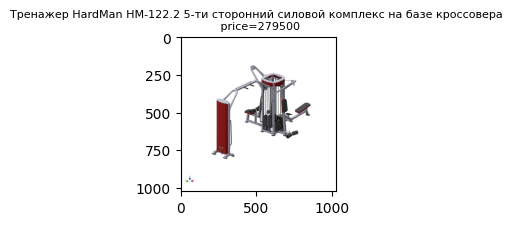

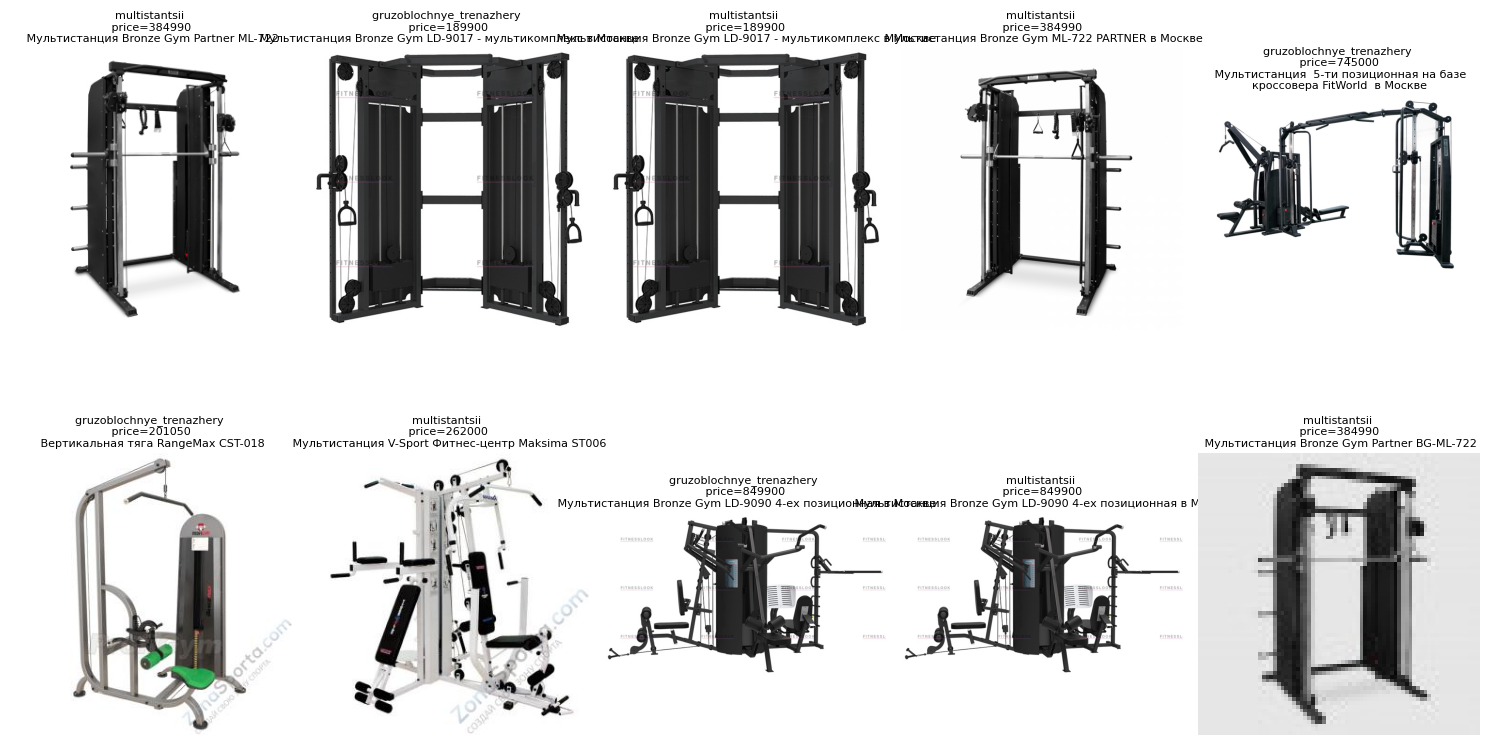

In [21]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=621,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v2,
    database_emb=databse_text_embeddings_v2,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

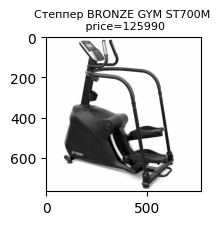

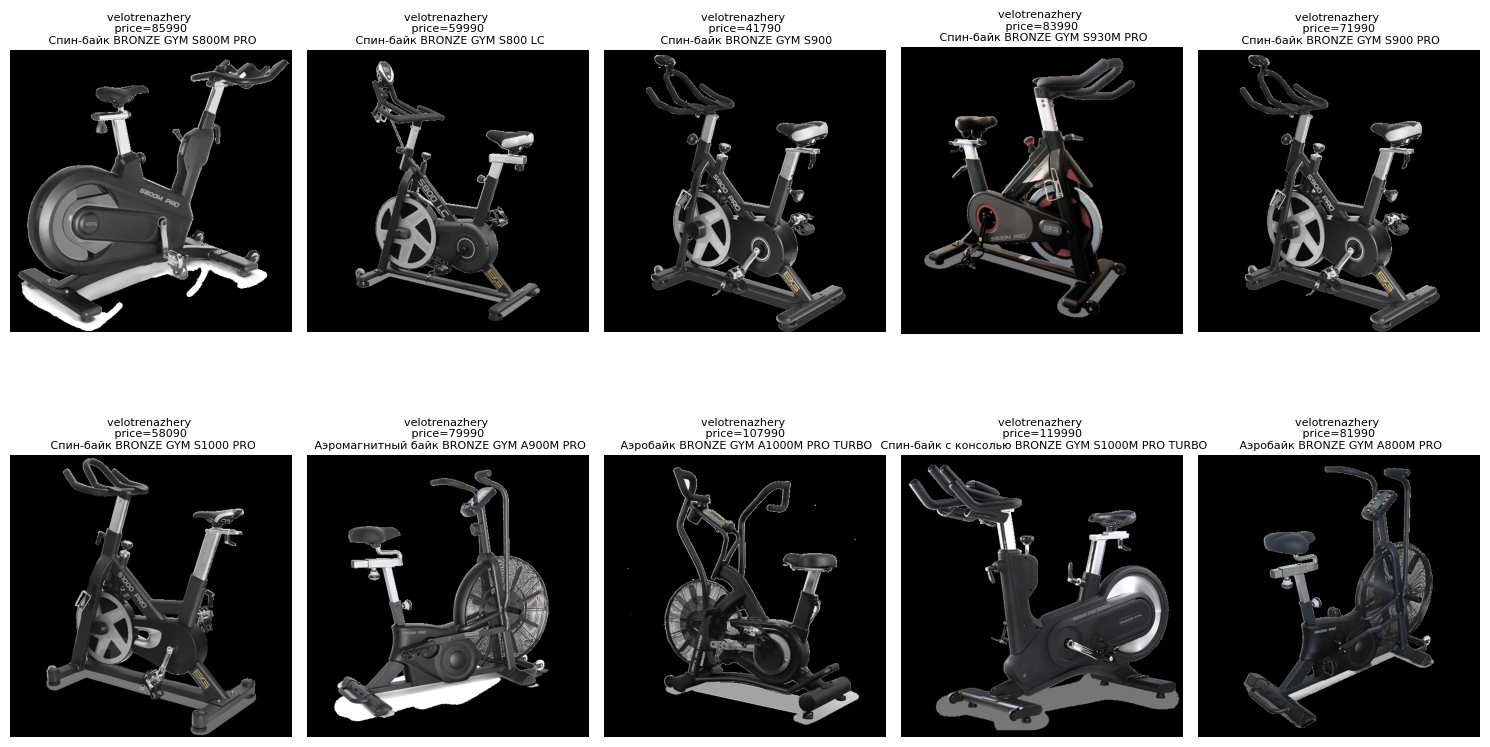

In [22]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=626,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v2,
    database_emb=databse_text_embeddings_v2,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

In [23]:
calc_ann_metric(10, forest, company_text_embeddings_v2, company_data, comparable_data)
calc_ann_metric(5, forest, company_text_embeddings_v2, company_data, comparable_data)

  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 10: 0.7867
trenazhery_na_svobodnykh_vesakh acc at 10: 0.6626
steppery acc at 10: 0.4291
ellipticheskie_trenazhery acc at 10: 0.9941
grebnye_trenazhery acc at 10: 0.639
velotrenazhery acc at 10: 0.983
begovye_dorozhki acc at 10: 1.0
Total acc at 10: 0.8511


  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 5: 0.8067
trenazhery_na_svobodnykh_vesakh acc at 5: 0.6816
steppery acc at 5: 0.4618
ellipticheskie_trenazhery acc at 5: 0.9979
grebnye_trenazhery acc at 5: 0.694
velotrenazhery acc at 5: 0.9937
begovye_dorozhki acc at 5: 1.0
Total acc at 5: 0.8663


In [24]:
company_text_embeddings_v3 = create_text_embeddings(
    "company_data.csv", model, tokenizer, info_used="caract"
)

  0%|          | 0/984 [00:00<?, ?it/s]

In [25]:
databse_text_embeddings_v3 = create_text_embeddings(
    "comparable_data.csv", model, tokenizer, info_used="caract"
)

  0%|          | 0/13718 [00:00<?, ?it/s]

In [26]:
forest = AnnoyIndex(len(databse_text_embeddings_v3[0]), metric="angular")
for i, item in tqdm(enumerate(databse_text_embeddings_v3)):
    forest.add_item(i, item.cpu().detach().tolist())
forest_labels = comparable_data["target"].tolist()
forest.build(50)
forest.save("forest_berttiny_not_trainedv3.ann")

0it [00:00, ?it/s]

True

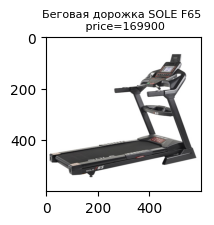

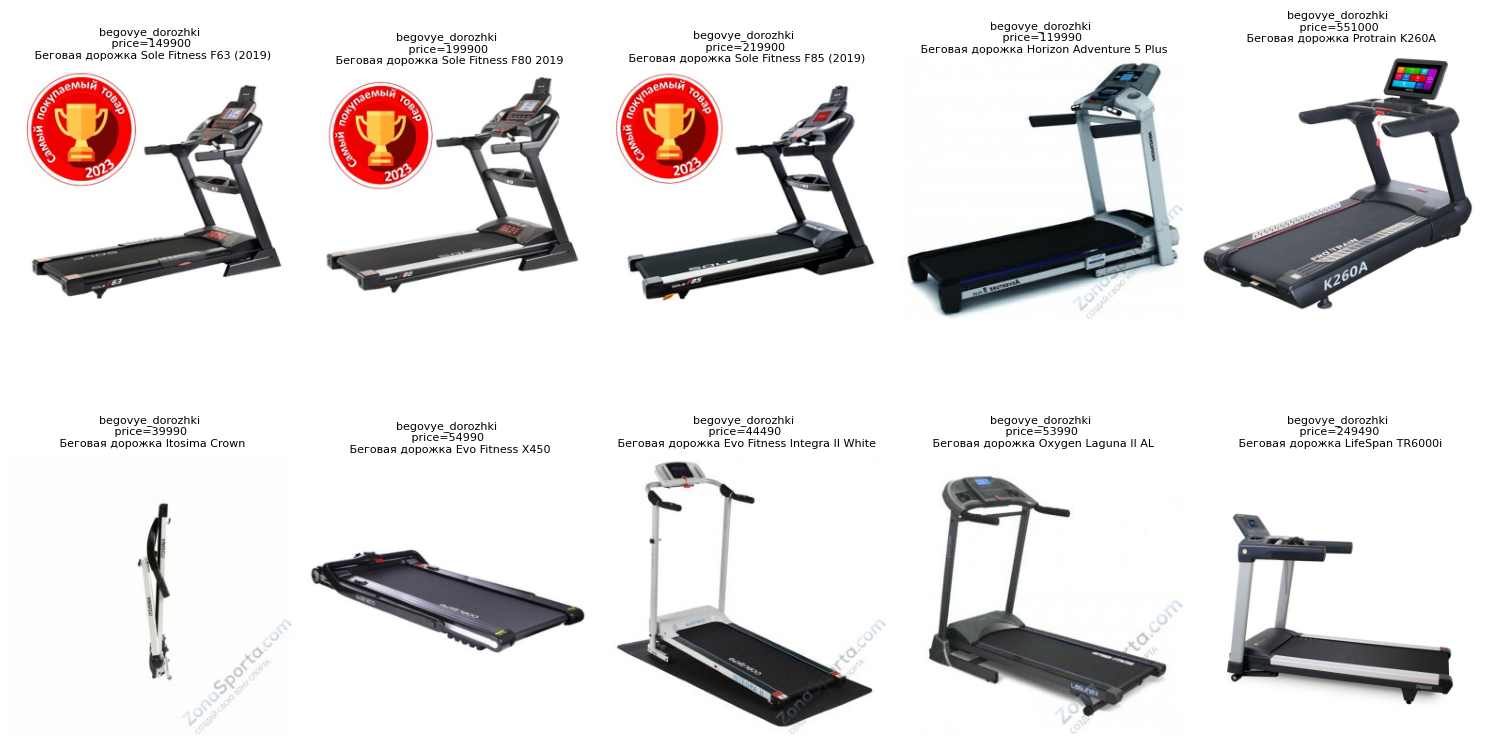

In [27]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=0,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v3,
    database_emb=databse_text_embeddings_v3,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

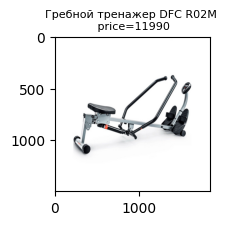

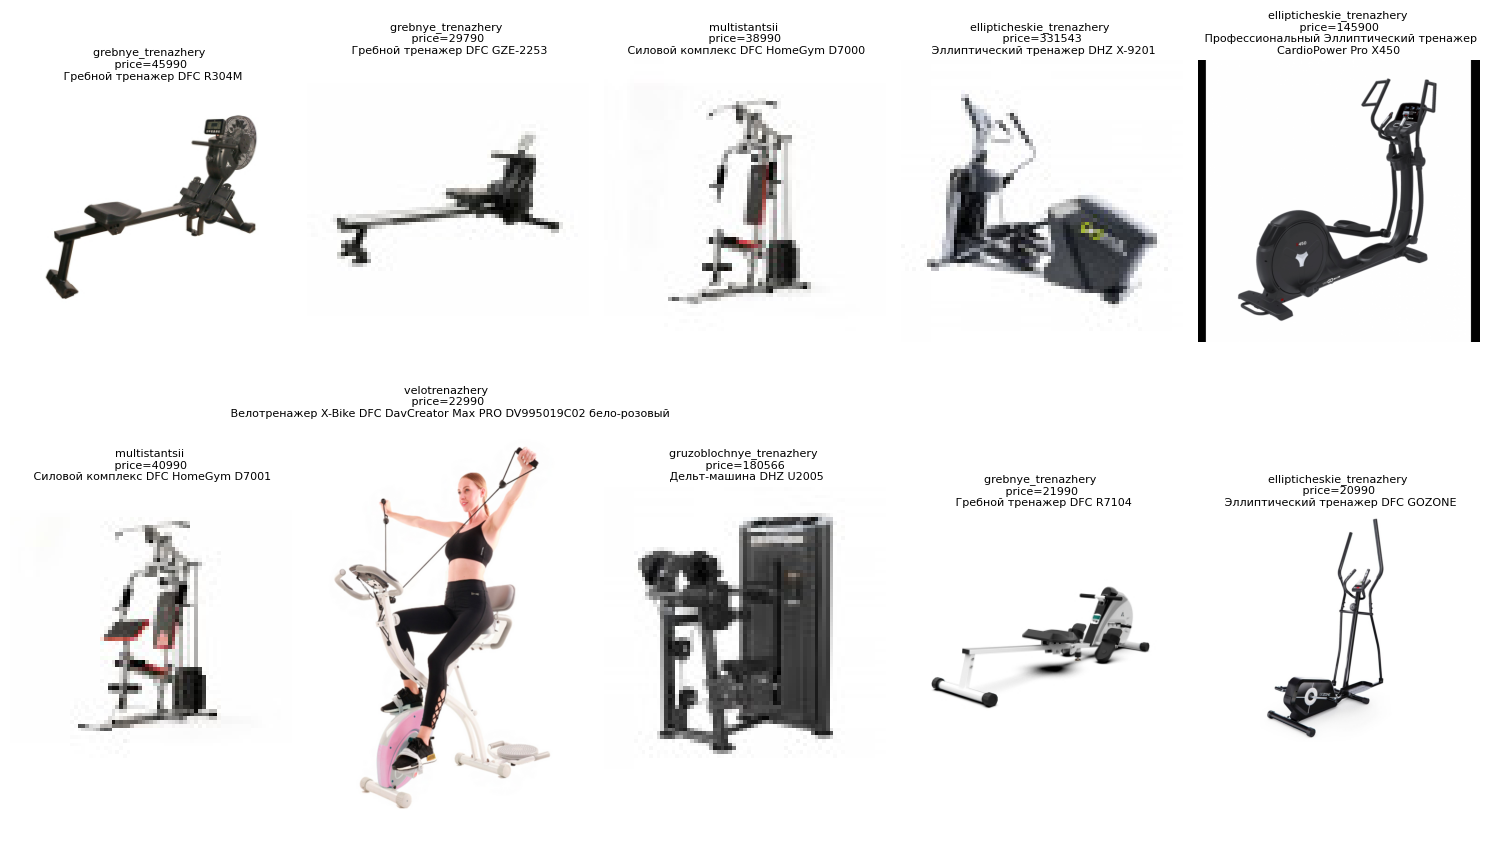

In [28]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=500,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v3,
    database_emb=databse_text_embeddings_v3,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

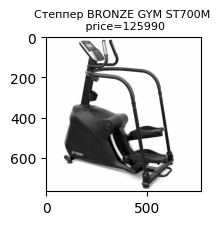

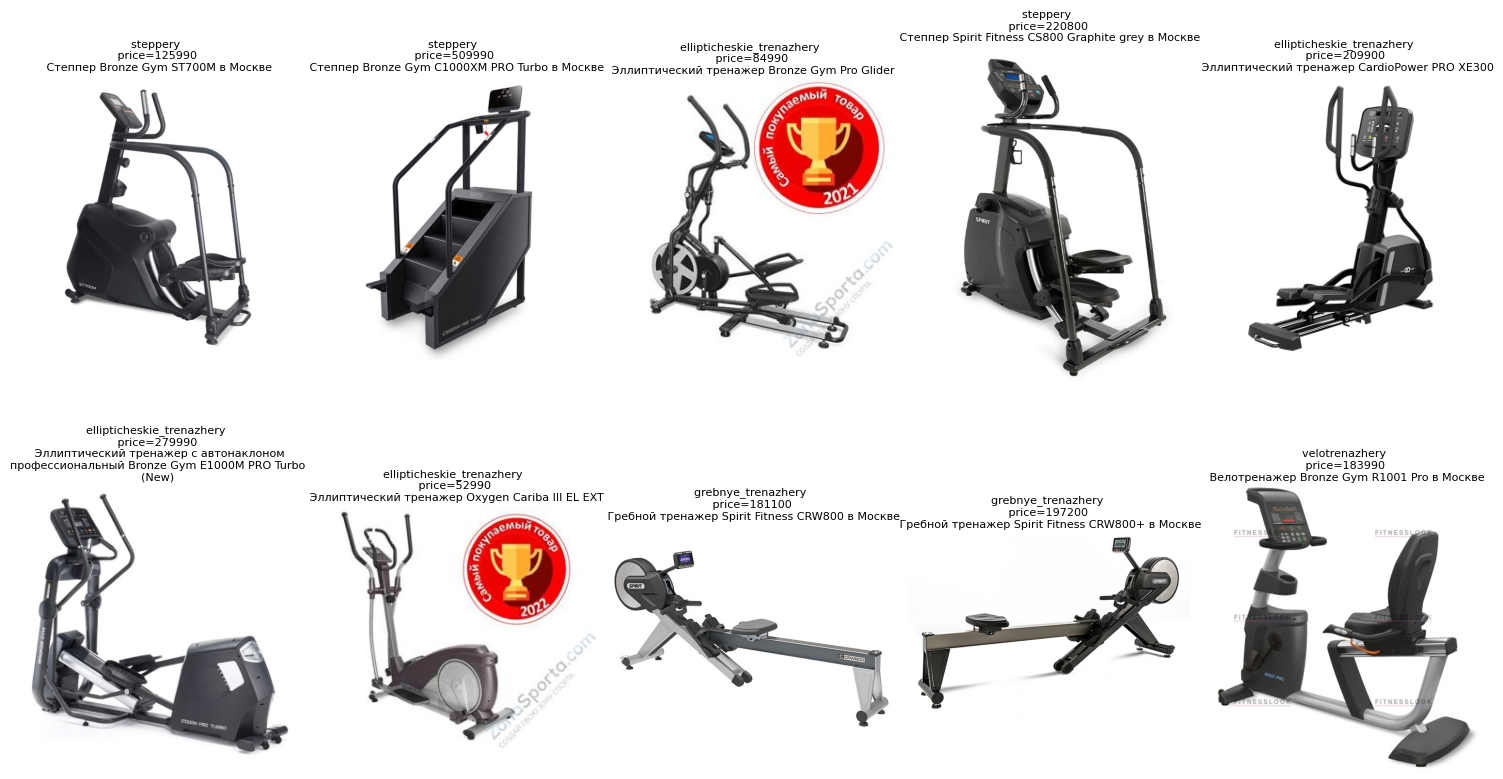

In [29]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=626,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v3,
    database_emb=databse_text_embeddings_v3,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

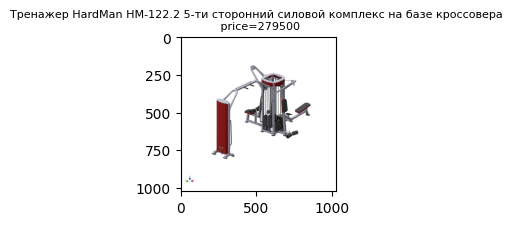

In [30]:
display_random_item(
    k=10,
    k_img=40,
    k_text=10,
    random_idx=621,
    method="ann",
    company_data=company_data,
    company_emb=company_text_embeddings_v3,
    database_emb=databse_text_embeddings_v3,
    comparable_data=comparable_data,
    forest=forest,
    text_model=model,
    tokenizer=tokenizer,
)

In [31]:
calc_ann_metric(10, forest, company_text_embeddings_v3, company_data, comparable_data)
calc_ann_metric(5, forest, company_text_embeddings_v3, company_data, comparable_data)

  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 10: 0.3817
trenazhery_na_svobodnykh_vesakh acc at 10: 0.332
steppery acc at 10: 0.2273
ellipticheskie_trenazhery acc at 10: 0.862
grebnye_trenazhery acc at 10: 0.502
velotrenazhery acc at 10: 0.6113
begovye_dorozhki acc at 10: 0.9519
Total acc at 10: 0.6314


  0%|          | 0/984 [00:00<?, ?it/s]

multistantsii acc at 5: 0.4017
trenazhery_na_svobodnykh_vesakh acc at 5: 0.3429
steppery acc at 5: 0.2764
ellipticheskie_trenazhery acc at 5: 0.8984
grebnye_trenazhery acc at 5: 0.548
velotrenazhery acc at 5: 0.6604
begovye_dorozhki acc at 5: 0.962
Total acc at 5: 0.66
